# Machine Learning approaches to predict Parkinson's Disease

In [1]:
# 1. Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, roc_curve, auc

# Models used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC

In [2]:
# Set display options for better readability
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 25)
pd.set_option('display.width', 100)

# Load the dataset
data = pd.read_csv('parkinsons.data')

# Display basic information about the dataset
print("\n📊 Dataset Overview")
print(f"Shape of the dataset: {data.shape}\n")

print("🔍 Data Types and Non-Null Counts:")
print(data.info(), "\n")

print("📈 Statistical Summary:")
print(data.describe())


📊 Dataset Overview
Shape of the dataset: (195, 24)

🔍 Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR 

## Details About the Data Set

**The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver,Colorado, who recorded the speech signals.**

**The original study published the feature extraction methods for general voice disorders.**

**Number of Instances: 195**

**Area: Life**

**Attribute Characteristics: Real**

**Number of Attributes: 23**

**Date Donated: 2008-06-26**

**Associated Tasks: Classification**

**Missing Values? N/A**

**File Size: 39.7 KB**

Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

Please refer to the below link for more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf



In [3]:
# find null value
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [4]:
df = pd.read_csv('parkinsons.data')
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
for i in df.columns:
    print("******************************************", i , 
         "**************************************************")
    print()
    print(set(df[i].tolist()))
    print()

****************************************** name **************************************************

{'phon_R01_S10_5', 'phon_R01_S18_6', 'phon_R01_S06_1', 'phon_R01_S06_6', 'phon_R01_S20_4', 'phon_R01_S08_4', 'phon_R01_S13_1', 'phon_R01_S07_3', 'phon_R01_S20_5', 'phon_R01_S13_6', 'phon_R01_S27_5', 'phon_R01_S42_2', 'phon_R01_S06_4', 'phon_R01_S35_3', 'phon_R01_S49_5', 'phon_R01_S33_3', 'phon_R01_S06_5', 'phon_R01_S10_3', 'phon_R01_S04_3', 'phon_R01_S19_1', 'phon_R01_S32_2', 'phon_R01_S17_1', 'phon_R01_S18_4', 'phon_R01_S37_4', 'phon_R01_S43_1', 'phon_R01_S25_3', 'phon_R01_S18_3', 'phon_R01_S01_3', 'phon_R01_S25_5', 'phon_R01_S24_3', 'phon_R01_S34_2', 'phon_R01_S02_4', 'phon_R01_S44_1', 'phon_R01_S32_5', 'phon_R01_S07_1', 'phon_R01_S25_2', 'phon_R01_S22_1', 'phon_R01_S07_4', 'phon_R01_S35_7', 'phon_R01_S31_5', 'phon_R01_S08_1', 'phon_R01_S50_6', 'phon_R01_S33_1', 'phon_R01_S44_5', 'phon_R01_S19_2', 'phon_R01_S04_2', 'phon_R01_S16_2', 'phon_R01_S26_2', 'phon_R01_S44_3', 'phon_R01_S10_2',

In [6]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

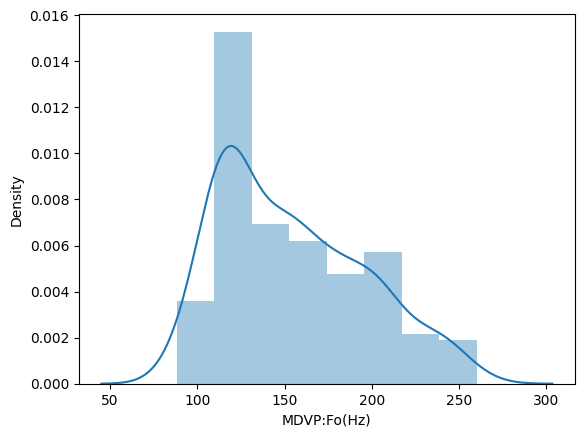

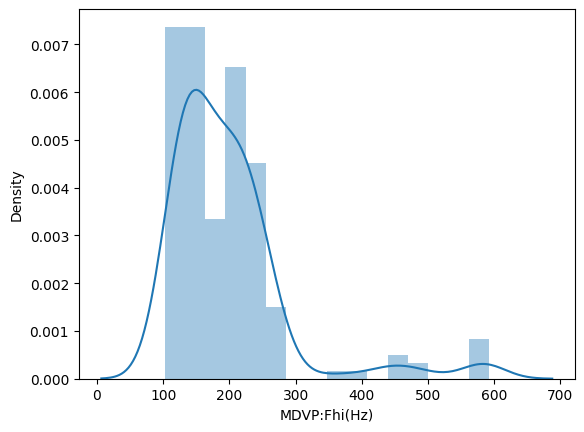

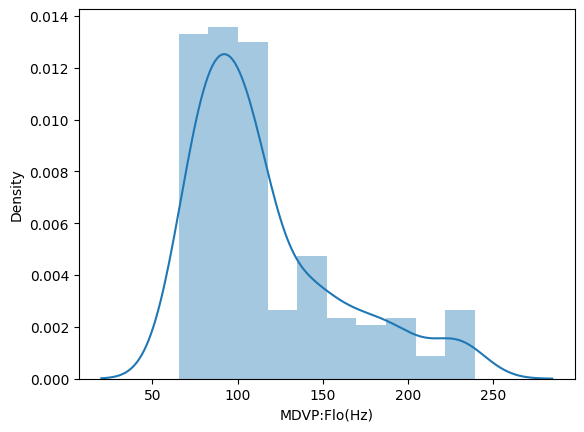

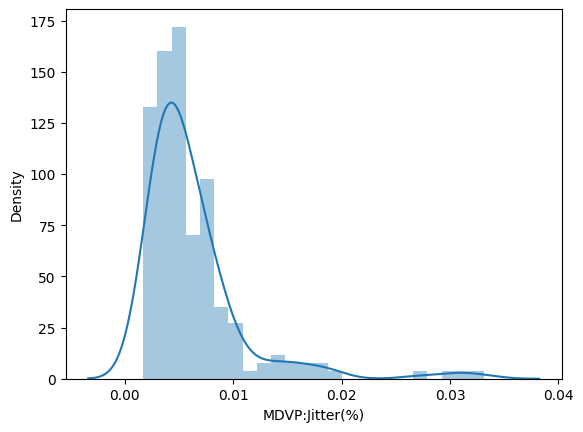

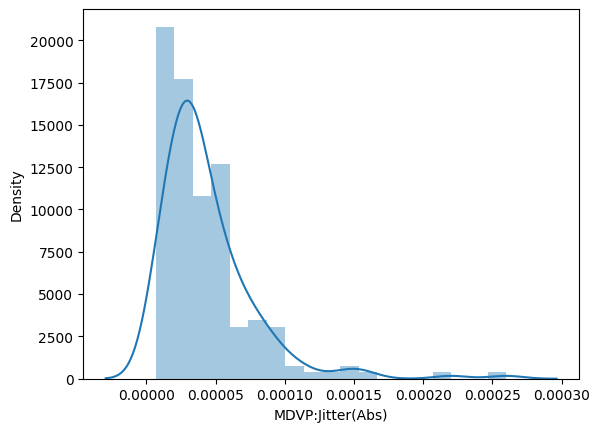

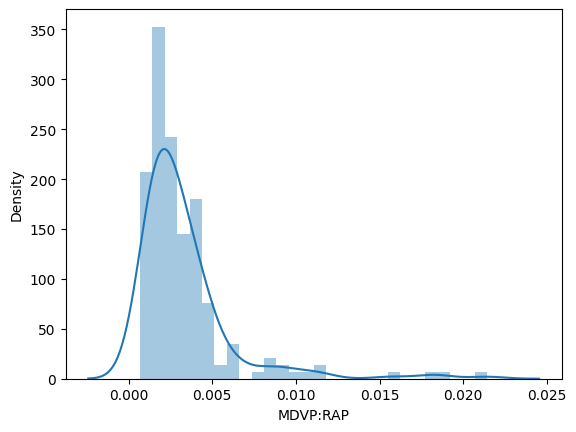

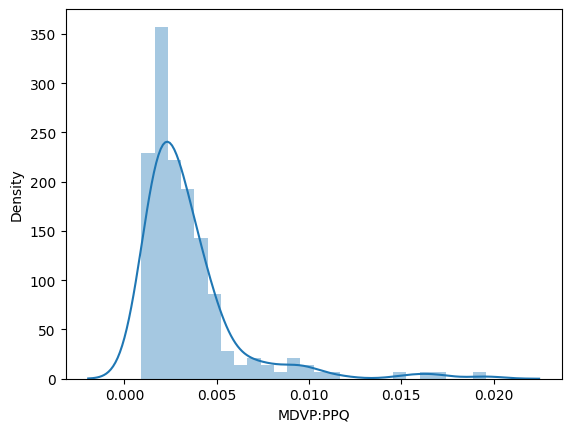

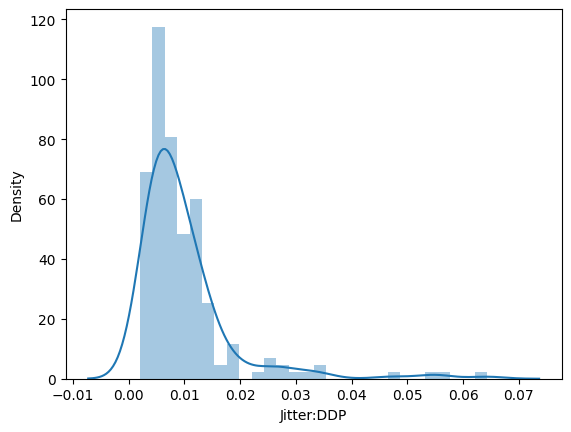

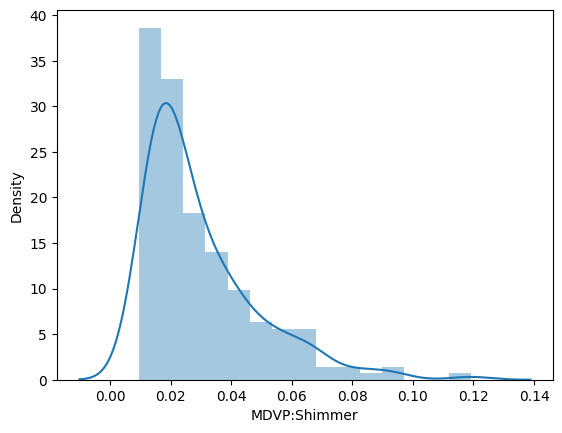

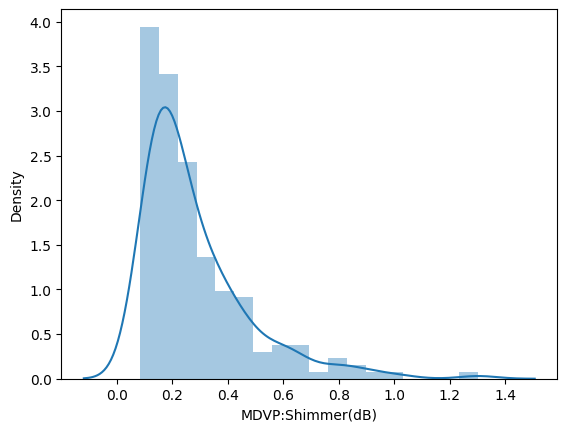

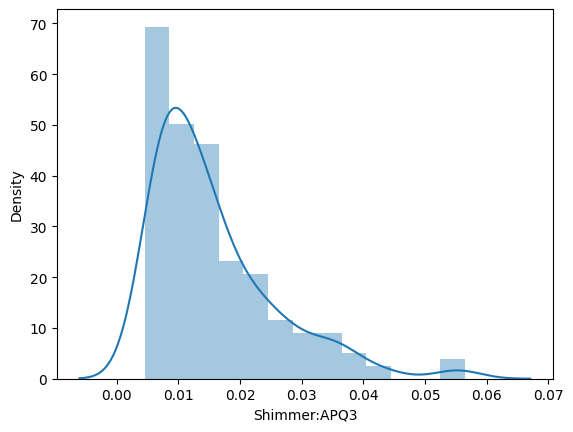

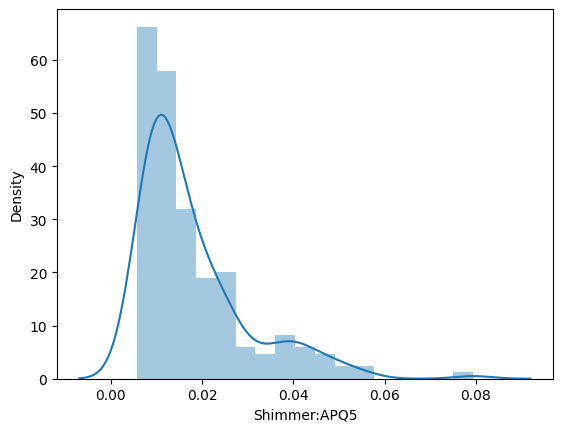

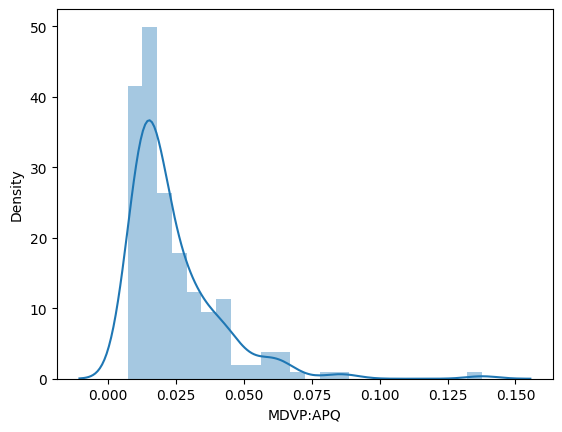

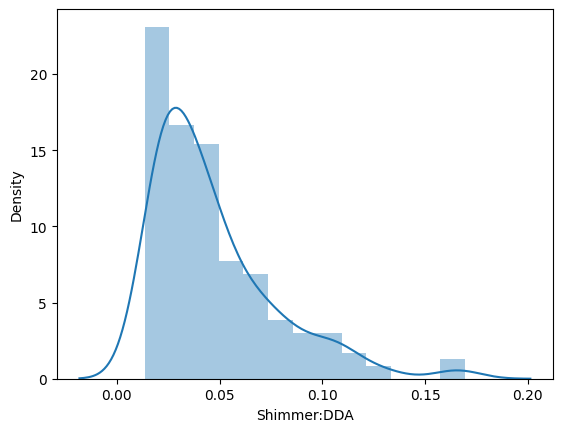

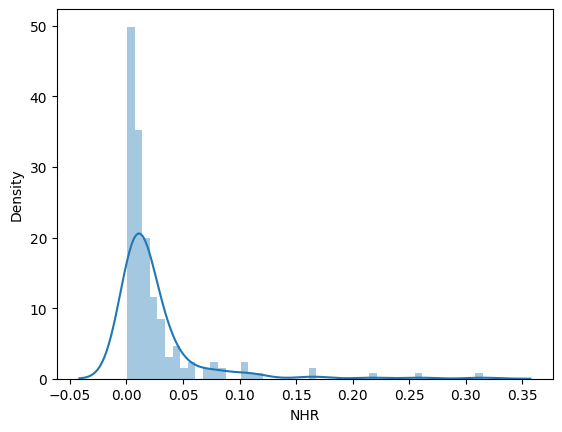

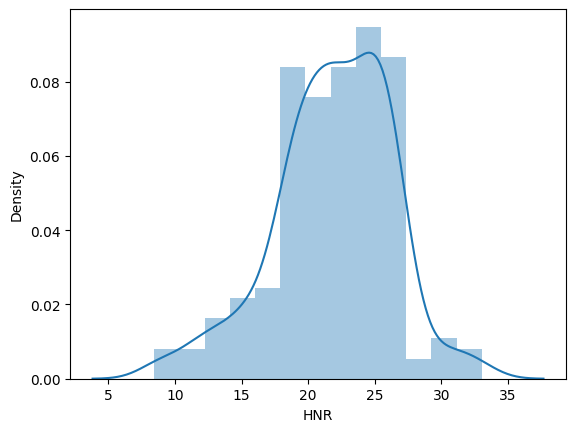

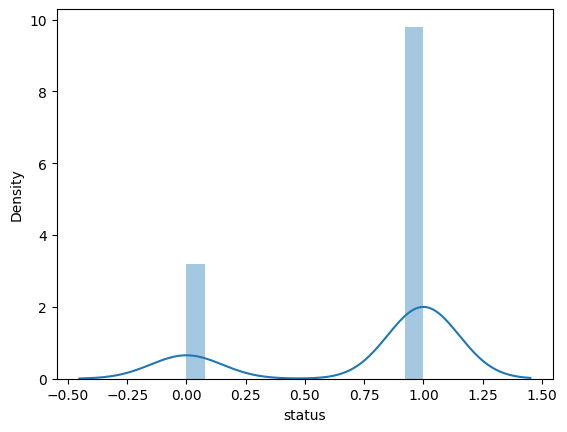

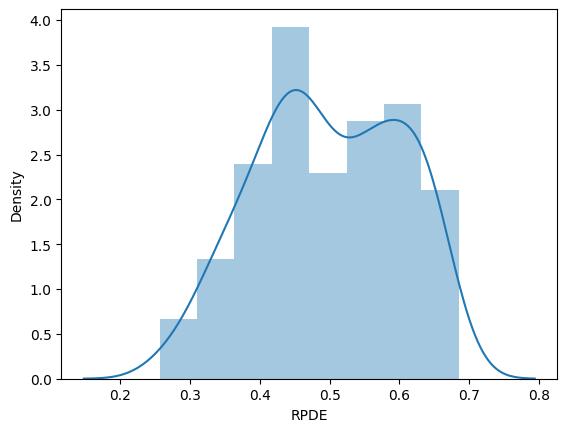

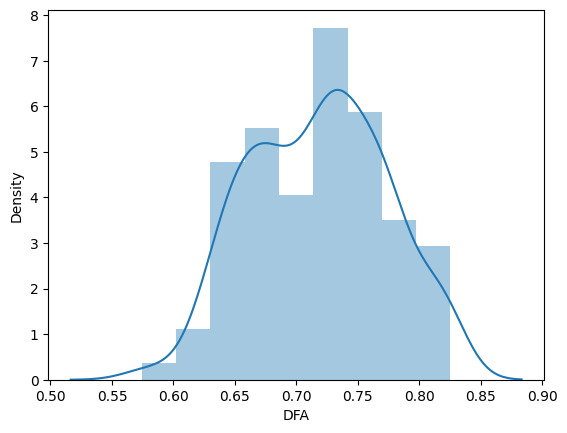

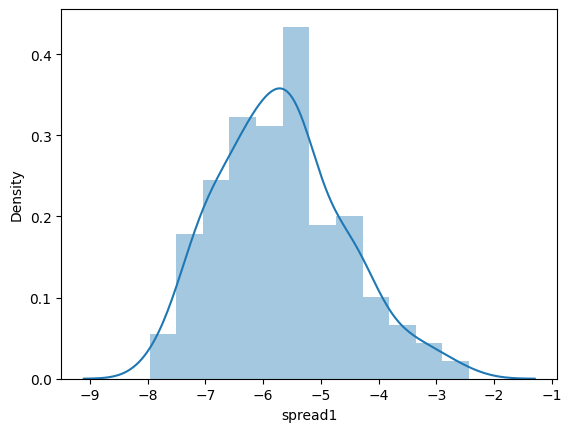

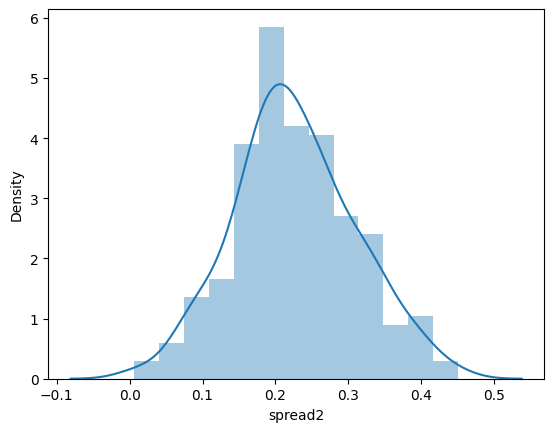

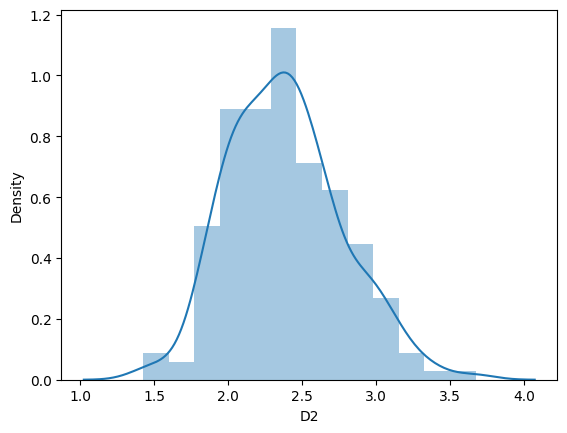

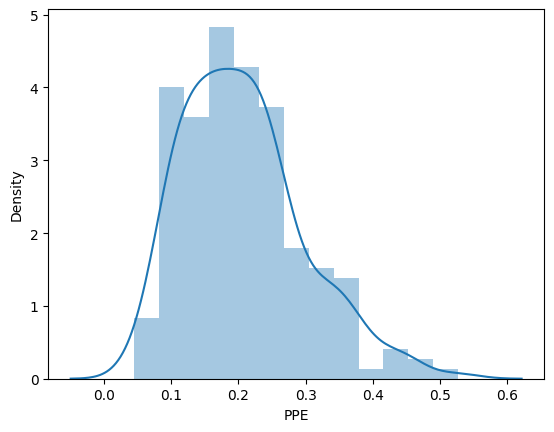

In [8]:
# find the distribution of the dataset

def distplots(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplots(i)

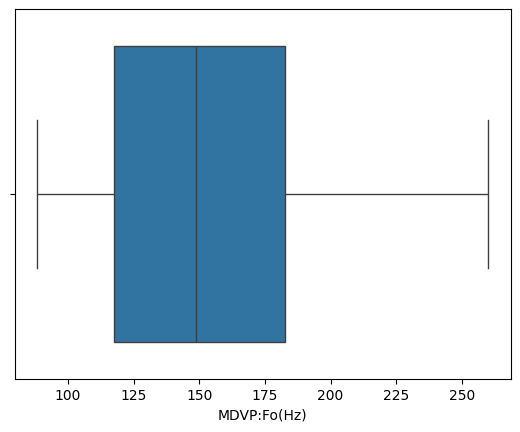

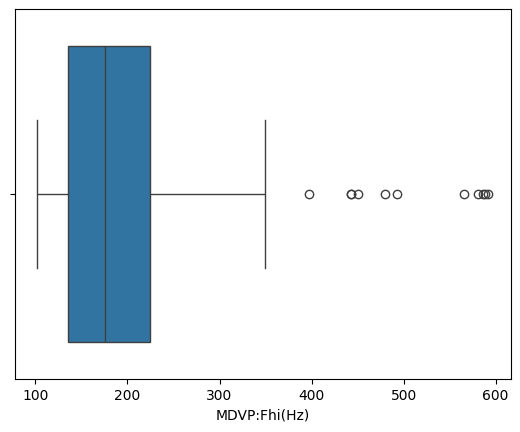

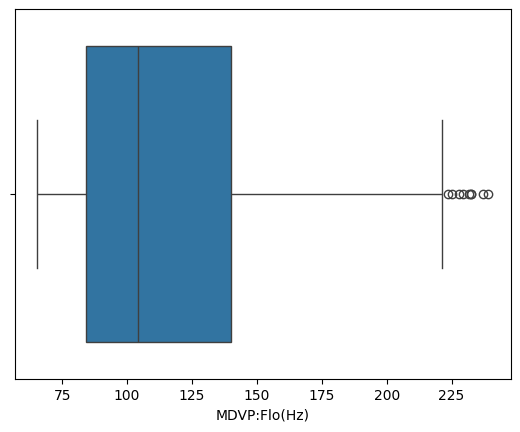

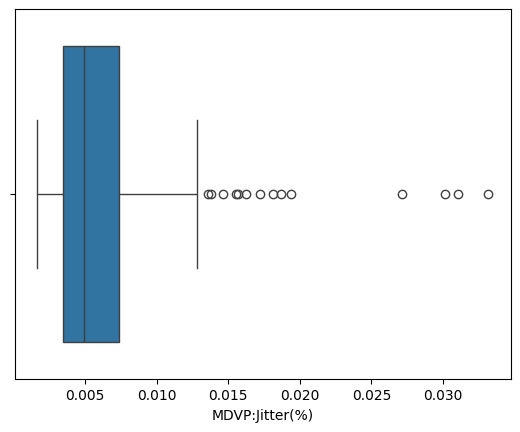

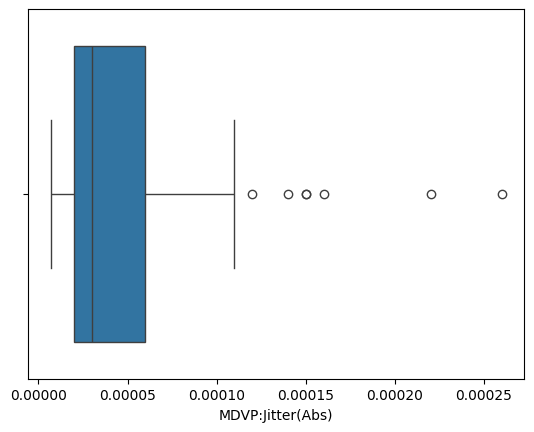

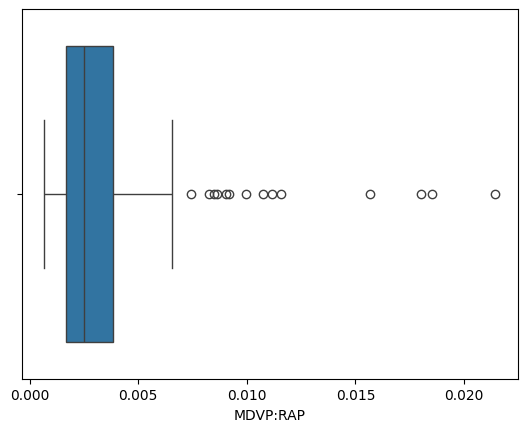

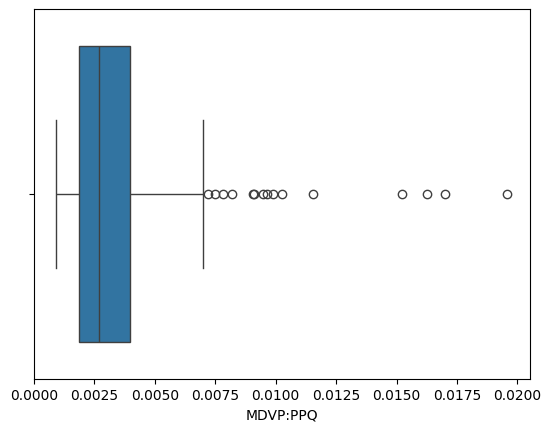

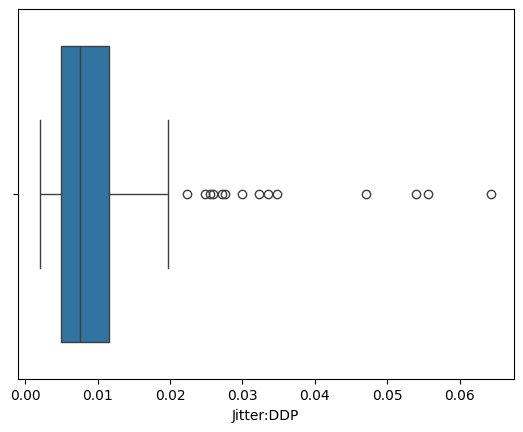

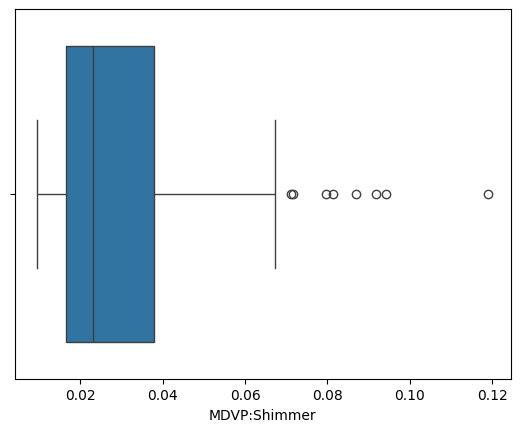

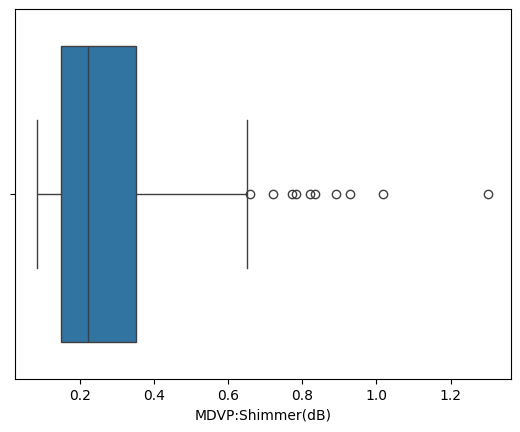

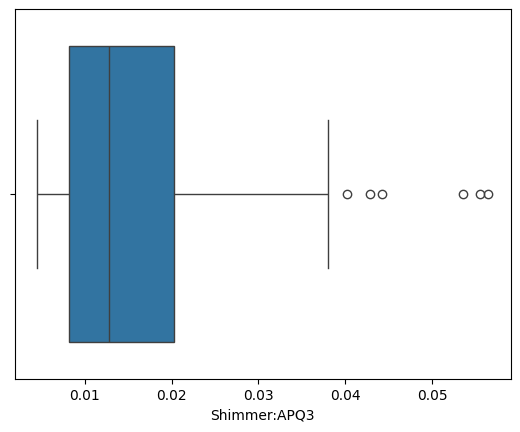

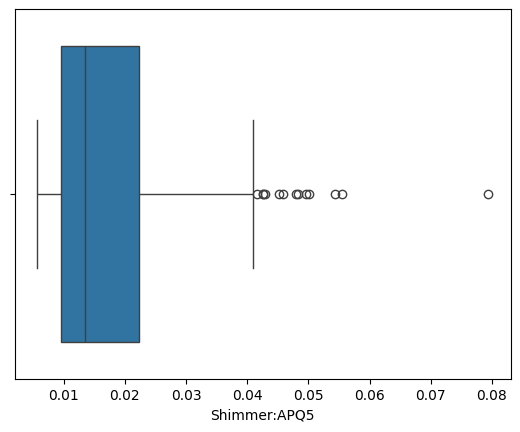

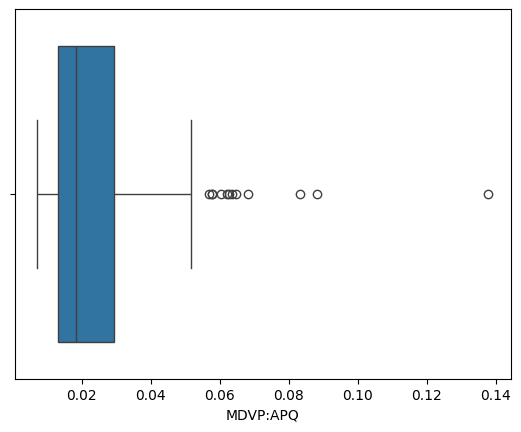

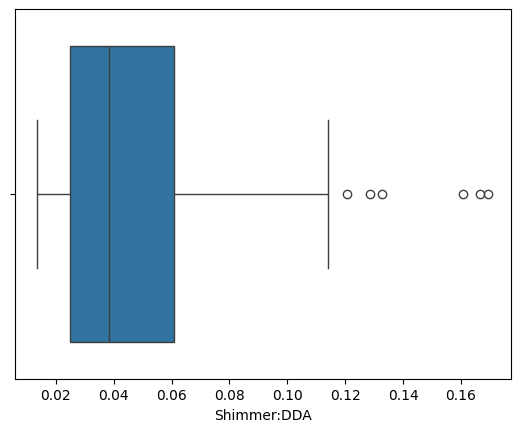

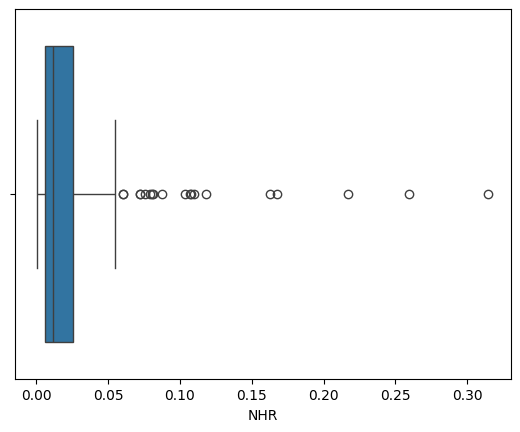

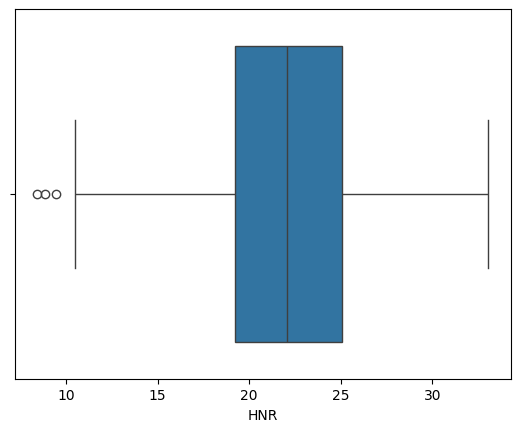

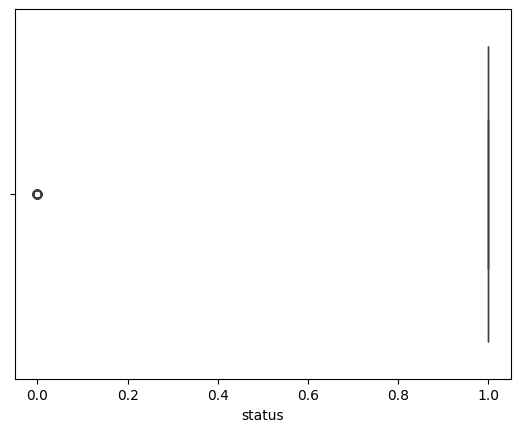

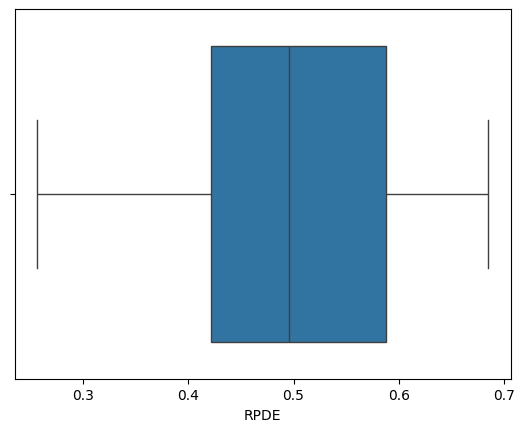

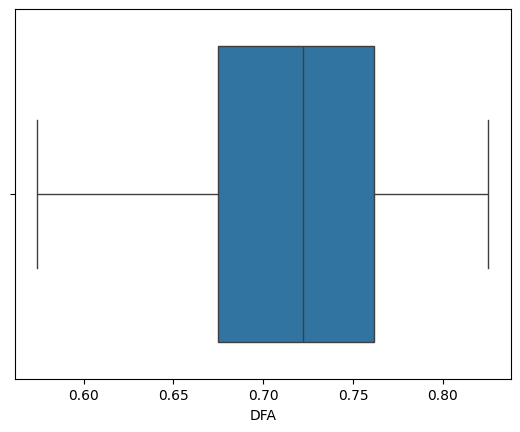

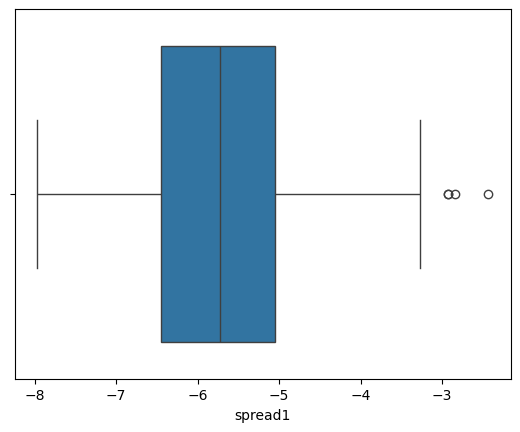

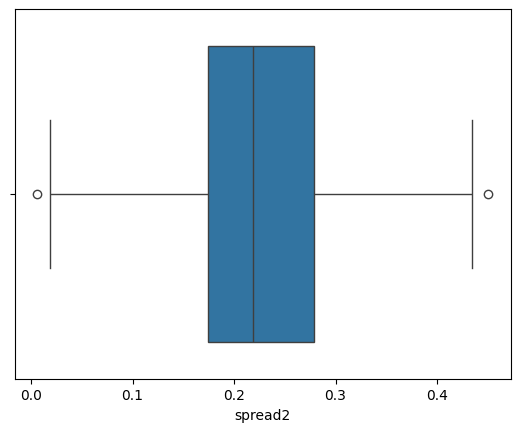

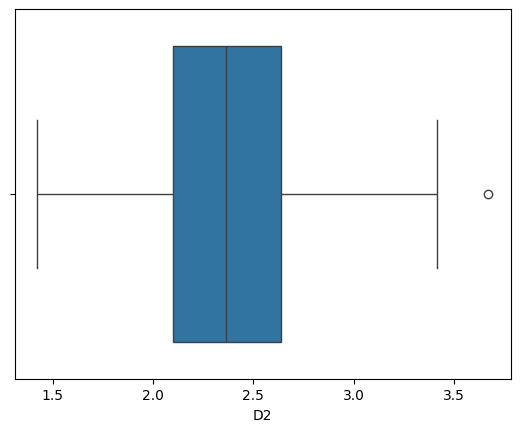

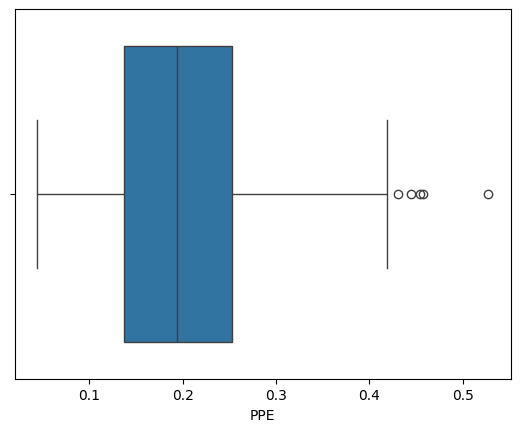

In [9]:
def boxplots(col):
    sns.boxplot(data=df, x=col, orient="h")
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplots(i)

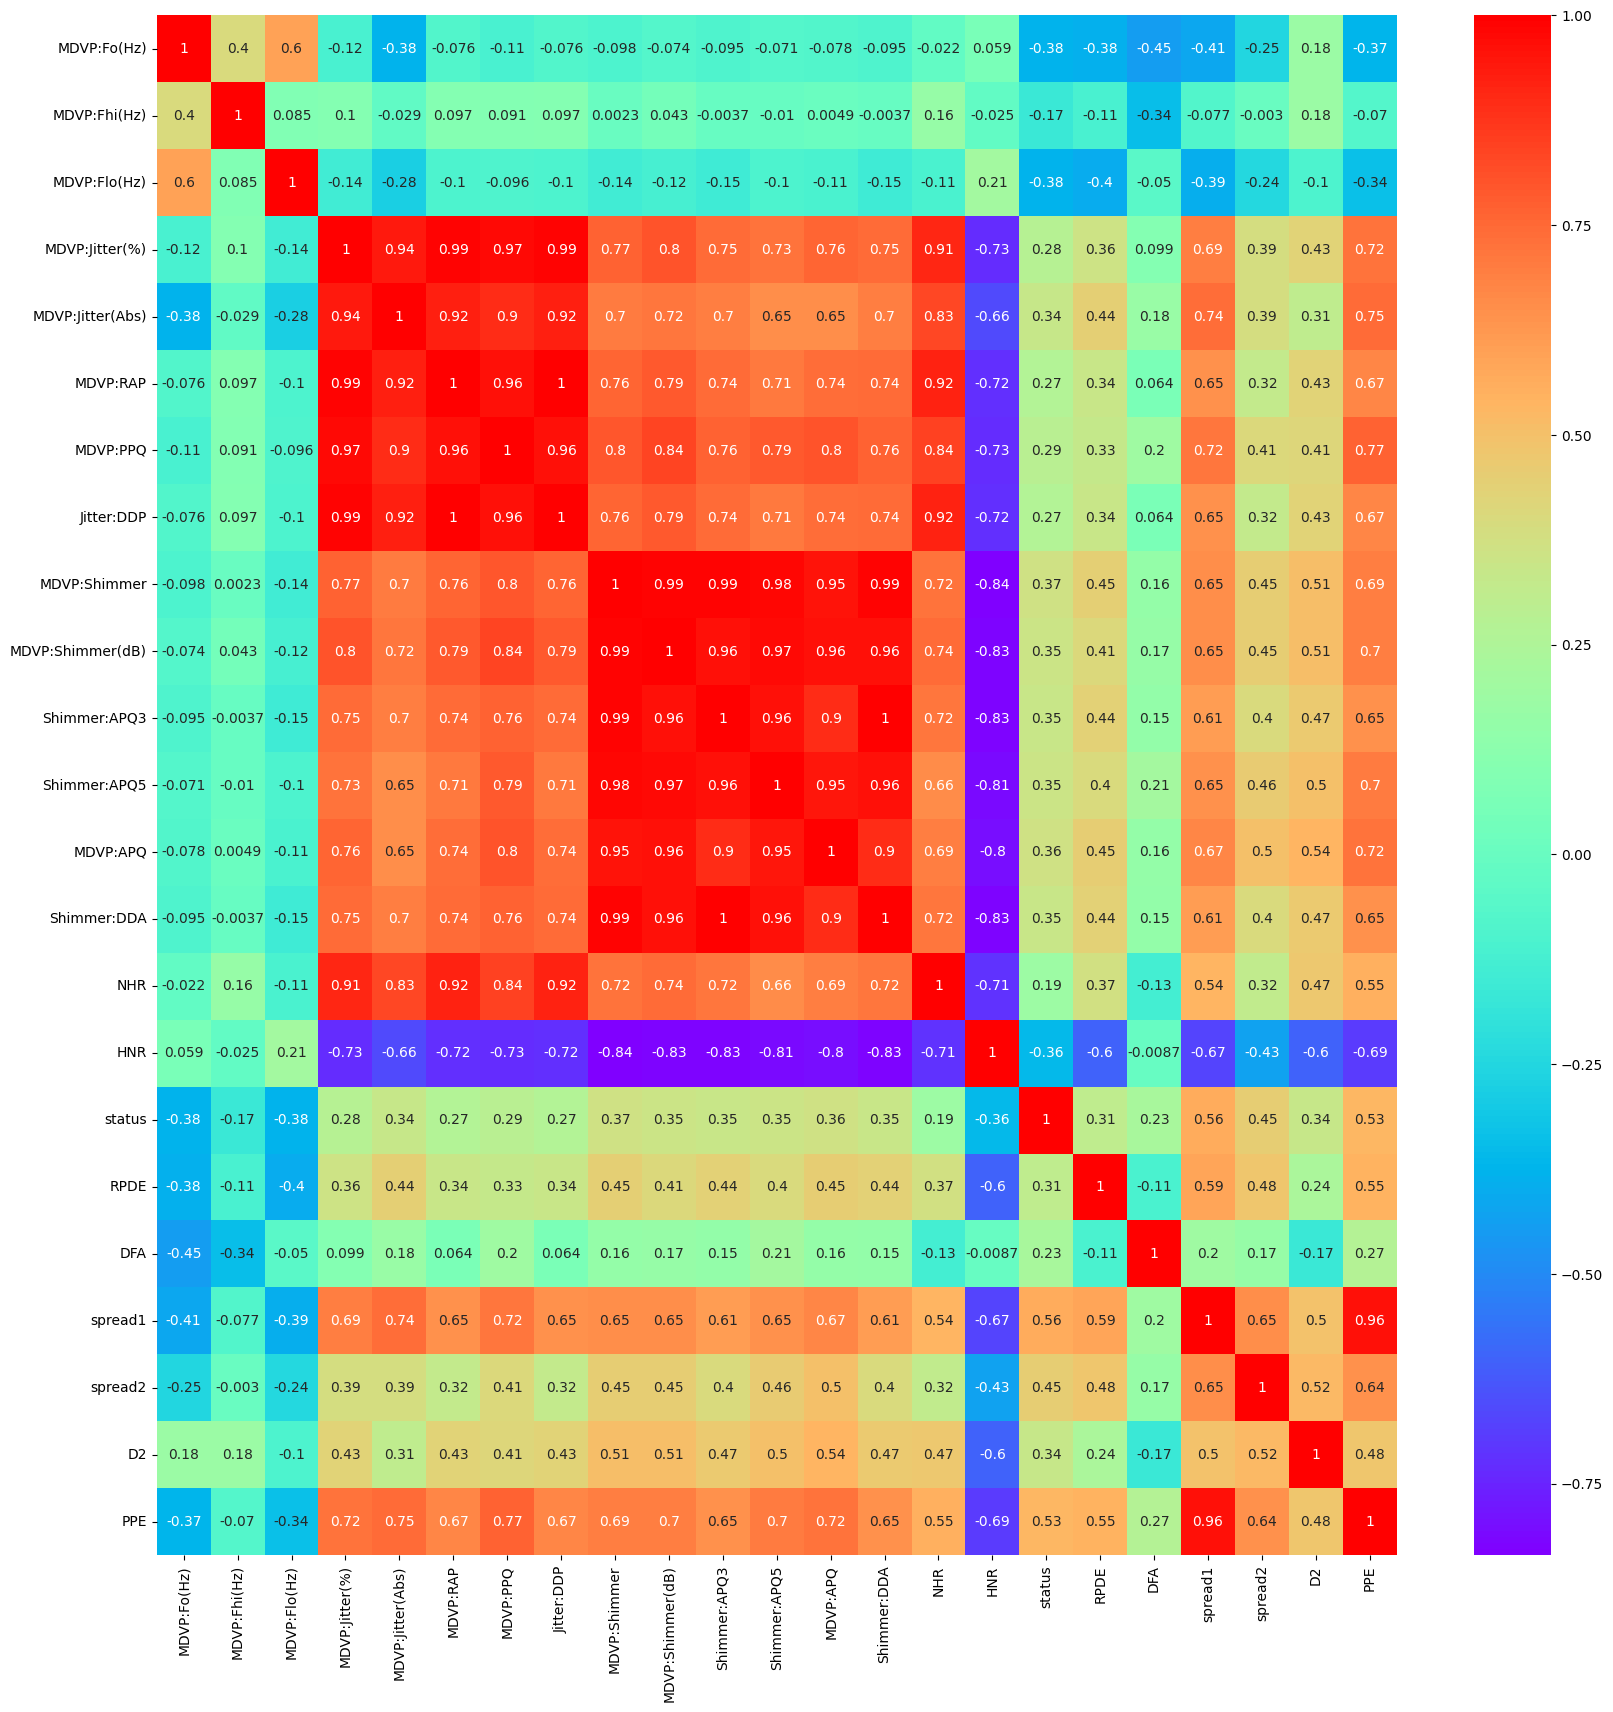

In [10]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Find correlation
plt.figure(figsize=(20, 20))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='rainbow')
plt.show()

In [11]:
#sns.pairplot(df)

In [12]:
x = df.drop(['status', 'name'], axis=1)
y = df['status']

In [13]:
x.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print("############")
print(y_ros.value_counts())

status
1    147
0     48
Name: count, dtype: int64
############
status
1    147
0    147
Name: count, dtype: int64


In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler((-1,1))
x = scaler.fit_transform(x_ros)
y = y_ros

In [18]:
x.shape

(294, 22)

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [21]:
pd.DataFrame(x_pca)

,0,1,2,3,4,5,6,7
0,1.233276,-0.500769,0.771062,-0.372429,-0.239862,0.203276,0.112459,-0.143777
1,1.988033,0.084095,1.108209,0.071700,-0.321119,0.275986,0.209153,-0.278403
2,1.676763,-0.133924,1.155339,-0.103839,-0.051831,0.214962,0.101761,-0.144166
3,1.816330,-0.100799,1.123748,-0.005189,-0.143386,0.319059,0.104587,-0.250056
4,2.195561,0.174565,1.326932,-0.312518,-0.013535,0.014435,0.148497,-0.586060
...,...,...,...,...,...,...,...,...
289,-0.397350,-0.860872,0.527523,-0.379071,0.078280,-0.159991,-0.085870,-0.300073
290,-1.645850,0.956687,0.545373,-0.324821,0.023070,-0.004286,-0.190598,-0.383644
291,-1.396825,1.138817,-0.177664,0.495490,0.100144,-0.049674,-0.020913,-0.071292
292,-0.617672,0.467359,-0.685471,-0.195385,-0.487305,-0.132157,-0.035100,0.040783


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=42 )

# Model Building

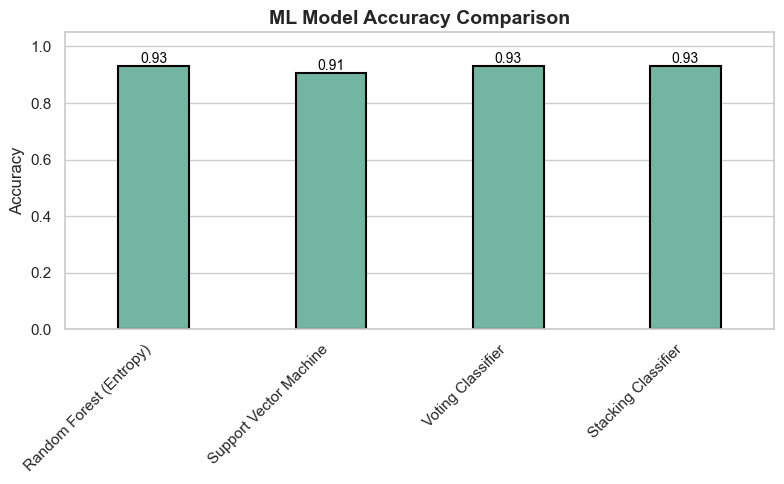


Model Performance Summary:
Random Forest - Accuracy: 0.9324, F1 Score: 0.9351
SVM            - Accuracy: 0.9054, F1 Score: 0.9067
Voting Classifier - Accuracy: 0.9324, F1 Score: 0.9351
Stacking Classifier - Accuracy: 0.9324, F1 Score: 0.9351


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

lr = LogisticRegression(C=1.0, max_iter=1000, solver='liblinear')
rf = RandomForestClassifier(n_estimators=80, criterion='entropy', max_depth=6, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', random_state=42)
svm = SVC(C=1.5, kernel='rbf', probability=True)
knn = KNeighborsClassifier(n_neighbors=5)

lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
knn.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_pred_svm = svm.predict(x_test)

accuracy_RF = accuracy_score(y_test, y_pred_rf)
accuracy_SVM = accuracy_score(y_test, y_pred_svm)

voting = VotingClassifier(estimators=[('rf', rf), ('svm', svm), ('lr', lr)], voting='soft')
voting.fit(x_train, y_train)
accuracy_VC = accuracy_score(y_test, voting.predict(x_test))

stacking = StackingClassifier(estimators=[('knn', knn), ('rf', rf), ('svm', svm)], final_estimator=LogisticRegression())
stacking.fit(x_train, y_train)
accuracy_SC = accuracy_score(y_test, stacking.predict(x_test))

df_accuracy = pd.DataFrame({
    'Method Used': ["Random Forest (Entropy)", "Support Vector Machine", "Voting Classifier", "Stacking Classifier"],
    'Accuracy': [accuracy_RF, accuracy_SVM, accuracy_VC, accuracy_SC]
})

sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(8, 5))
chart = sns.barplot(x='Method Used', y='Accuracy', data=df_accuracy, width=0.4, edgecolor='black', linewidth=1.5)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
for p in chart.patches:
    chart.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=10, color='black')
plt.title("ML Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xlabel("")
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# ================================
# ================================
from sklearn.metrics import f1_score

y_pred_svm = svm.predict(x_test)
y_pred_voting = voting.predict(x_test)
y_pred_stacking = stacking.predict(x_test)

f1_RF = f1_score(y_test, y_pred_rf)
f1_SVM = f1_score(y_test, y_pred_svm)
f1_VC = f1_score(y_test, y_pred_voting)
f1_SC = f1_score(y_test, y_pred_stacking)

print("\nModel Performance Summary:")
print(f"Random Forest - Accuracy: {accuracy_RF:.4f}, F1 Score: {f1_RF:.4f}")
print(f"SVM            - Accuracy: {accuracy_SVM:.4f}, F1 Score: {f1_SVM:.4f}")
print(f"Voting Classifier - Accuracy: {accuracy_VC:.4f}, F1 Score: {f1_VC:.4f}")
print(f"Stacking Classifier - Accuracy: {accuracy_SC:.4f}, F1 Score: {f1_SC:.4f}")


In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_all(models, x_test, y_test):
    plt.figure(figsize=(10, 8))

    for model, name in models:
        if hasattr(model, "predict_proba"):
            scores = model.predict_proba(x_test)[:, 1]
        elif hasattr(model, "decision_function"):
            scores = model.decision_function(x_test)
            scores = (scores - scores.min()) / (scores.max() - scores.min())
        else:
            continue

        fpr, tpr, _ = roc_curve(y_test, scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc:.2f}')

    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Top 4 Models")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


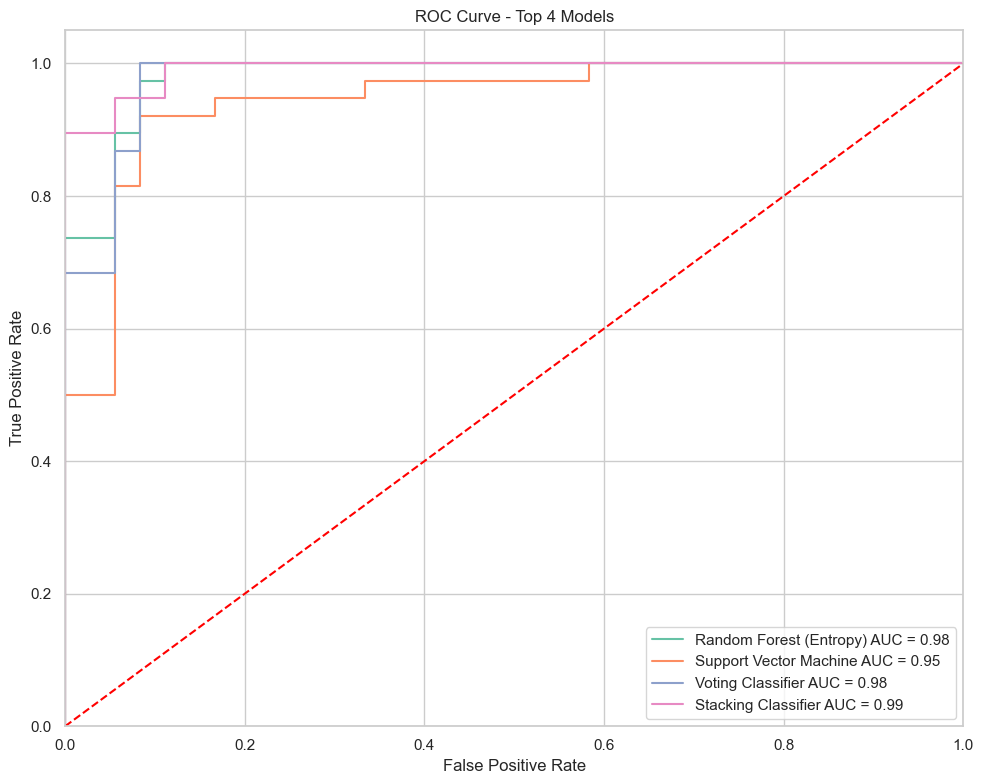

In [25]:
plot_roc_all([
    (rf, "Random Forest (Entropy)"),
    (svm, "Support Vector Machine"),
    (voting, "Voting Classifier"),
    (stacking, "Stacking Classifier")
], x_test, y_test)
